In [3]:
import numpy as np
import seaborn as sns
import numpy.random as rd
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math
import scipy.stats as st

Требуется продемонстрировать выполнение следующего утверждения о скорости сходимости в теореме Пуассона:
$$\sum\limits^\inf_{k=0}|P(\xi_n=k)-\pi_k| \leq \frac{2\lambda}{n}\min(2, \lambda)$$
где $\pi_k = \frac{\lambda^k e^{-\lambda}}{k!}$, $k = 0, 1, 2,\ldots$, $P(\xi_n=k)$ --- вероятность получить $k$ успехов в $n$ испытаниях Бернулли

Рассмотрим такое неравенство:
$$\sum\limits^l_{k=0}|P(\xi_n=k)-\pi_k| \leq \frac{2\lambda}{n}\min(2, \lambda)$$

Для того, чтобы показать сходимость, смоделируем его для различных $l$, $\lambda$ и $n$. 
Будем увеличивать $l$ и увидим, что левая часть не становится больше правой. Для того, чтобы проверить, что это не случайность, покажем это для разных $\lambda$ и $n$. Учитывая тот факт, что в теореме Пуассона $\lim_{n \rightarrow \infty} np = \lambda$, будем брать $p = \frac{\lambda}{n}$ в биноминальном распределении.

Будем по очереди рассматривать различные $\lambda$ и менять для них $n$, каждому $n$ соответствует свой график. Начнем с маленьких $\lambda$. На графике правую часть неравенства обозначим $right$ - это будет прямая, точки - значения левой части для различных l. Посмотрим, как точки ведут себя относительно прямой. Для того, чтобы наша гипотеза подтвердилась, нужно, чтобы точки никогда не достигали прямой.

Далее $\lambda = 1$ 

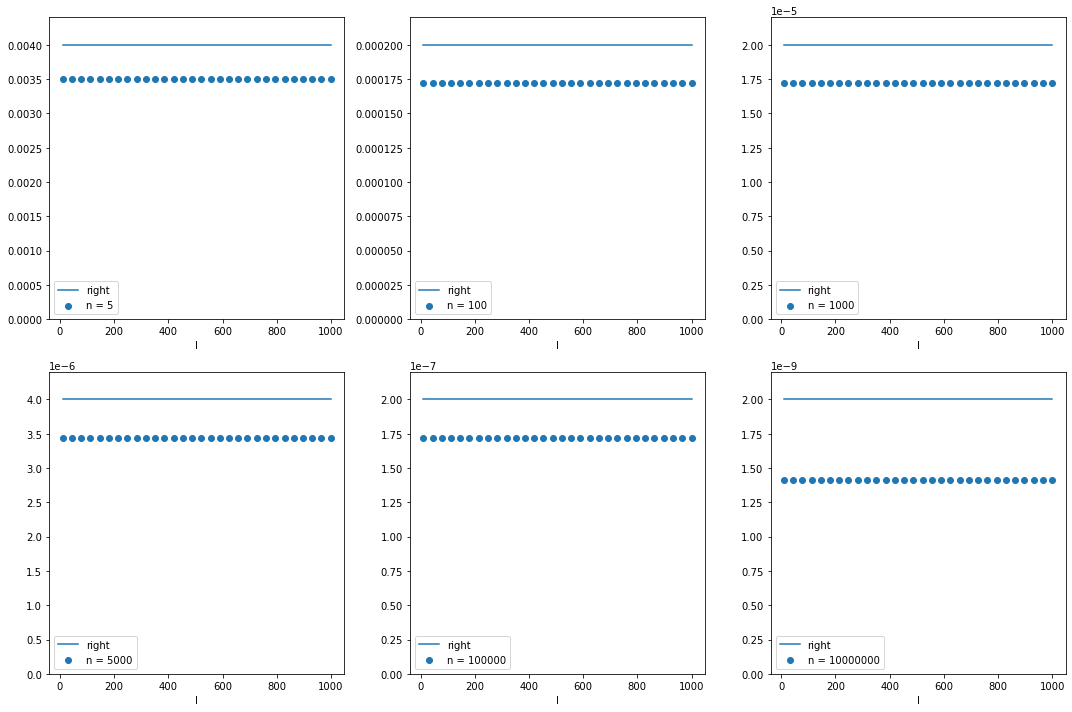

In [117]:
cmap = plt.get_cmap("tab10").colors

plt.figure(figsize=(15, 10))

lam = 0.1
l = 1000
dots = np.linspace(10, l,30).astype(int)
#print(dots)

for i, n in enumerate([5, 100, 1000, 5000, 100000, 10000000]):
    p = lam/n
    right = 2*lam/n*min(2, lam)

    cur_sum = 0
    sums = []
    for k in range(l+1):
        cur_sum += abs(st.binom.pmf(k, n, p) - st.poisson.pmf(k, lam))
        if k in dots:
            sums.append(cur_sum)
    
    plt.tight_layout()
    plt.subplot(2, 3, i+1)
    plt.plot(dots, [right]*len(dots), label ="right")
    plt.scatter(dots, sums, label="n = " +str(n))
    plt.ylim(0, right*1.1)
    plt.xlabel("l")
    plt.legend()



Если приглядеться к графиками выше, то можно заметить, что расстояние между прямой $right$ и точками уменьшается при увеличении $n$, но даже при больших $n$ точки лежат ниже. Здесь пока не заметно, что сумма постепенно растет и выходит на некоторое плато, но это можно будет увидеть дальше. Значение $l$ в процессе моделирования подбиралось по этому критерию.

Теперь начнем увеличивать $\lambda$. Далее $\lambda = 5$. Заметим, что $n$ не может быть меньше $\lambda$, иначе вероятность будет больше нуля, поэтому в дальнейшем массив с $n$ будет немного меняться.

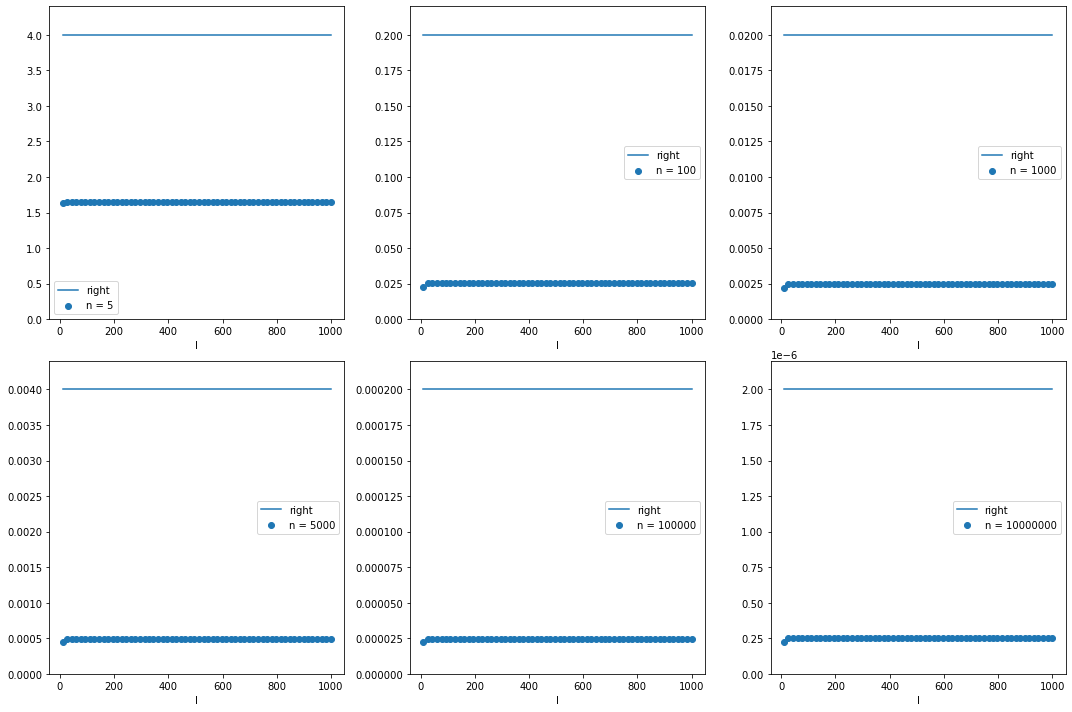

In [118]:
cmap = plt.get_cmap("tab10").colors

plt.figure(figsize=(15, 10))

lam = 5
l = 1000
dots = np.linspace(10, l,60).astype(int)
#print(dots)

for i, n in enumerate([5, 100, 1000, 5000, 100000, 10000000]):
    p = lam/n
    right = 2*lam/n*min(2, lam)

    cur_sum = 0
    sums = []
    for k in range(l+1):
        cur_sum += abs(st.binom.pmf(k, n, p) - st.poisson.pmf(k, lam))
        if k in dots:
            sums.append(cur_sum)
    
    plt.tight_layout()
    plt.subplot(2, 3, i+1)
    plt.plot(dots, [right]*len(dots), label ="right")
    plt.scatter(dots, sums, label="n = " +str(n))
    plt.ylim(0, right*1.1)
    plt.xlabel("l")
    plt.legend()



Здесь ситуация та же, что и с предыдущим $\lambda$: расстояние между прямой $right$ и точками уменьшается при увеличении $n$, но даже при больших $n$ точки лежат ниже.

Возьмем $\lambda=100$:

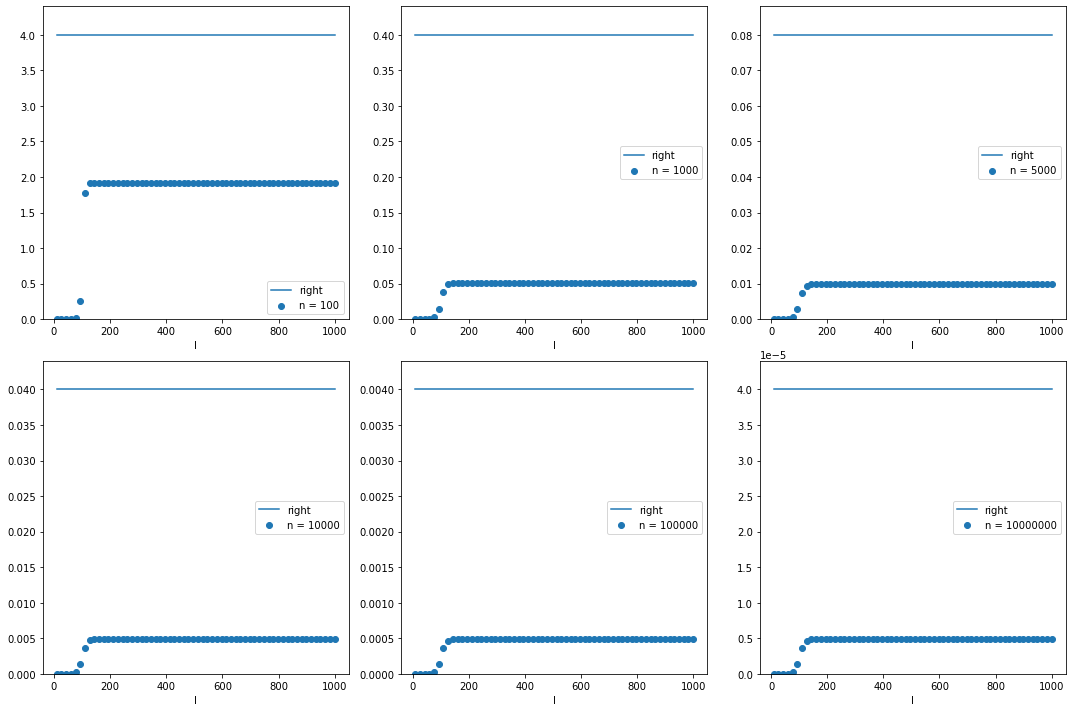

In [119]:
cmap = plt.get_cmap("tab10").colors

plt.figure(figsize=(15, 10))

lam = 100
#print("lambda =", lam)
l = 1000
dots = np.linspace(10, l,60).astype(int)
#print(dots)

for i, n in enumerate([100, 1000, 5000, 10000, 100000, 10000000]):
    p = lam/n
    right = 2*lam/n*min(2, lam)

    cur_sum = 0
    sums = []
    for k in range(l+1):
        cur_sum += abs(st.binom.pmf(k, n, p) - st.poisson.pmf(k, lam))
        if k in dots:
            sums.append(cur_sum)
    
    plt.tight_layout()
    plt.subplot(2, 3, i+1)
    plt.plot(dots, [right]*len(dots), label ="right")
    plt.scatter(dots, sums, label="n = " +str(n))
    plt.ylim(0, right*1.1)
    plt.xlabel("l")

    plt.legend()



Здесь ситуация такая же. На графиках видно плато, к которому стремится сумма.

Рассмотрим совсем большое $\lambda = 1000$

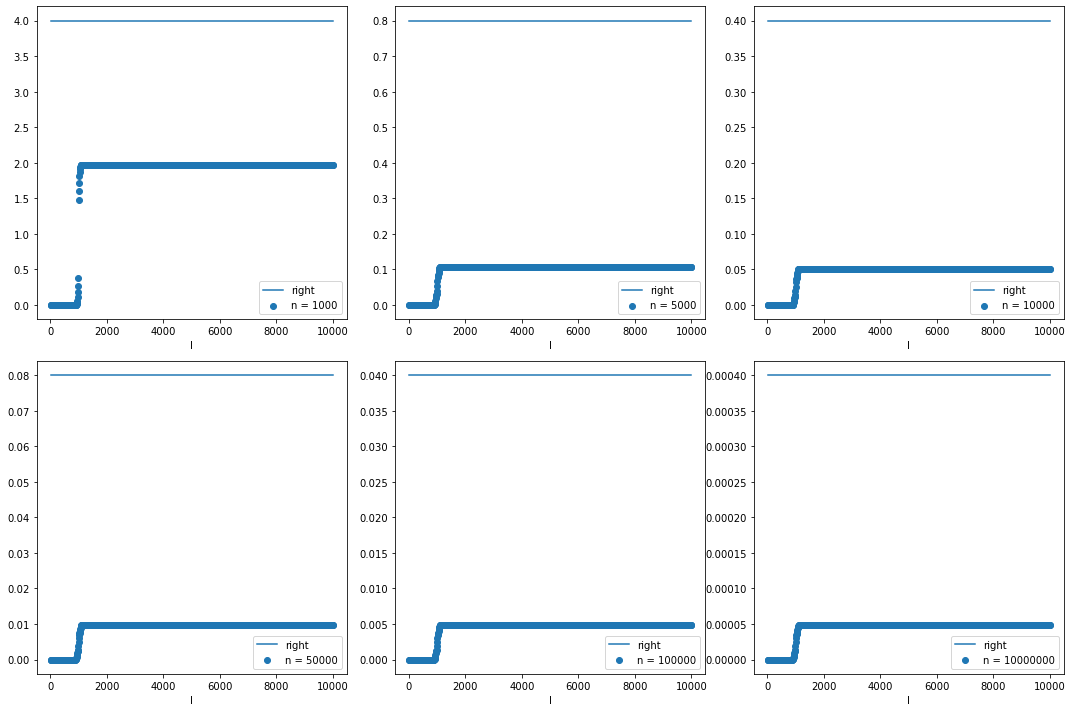

In [120]:
cmap = plt.get_cmap("tab10").colors

plt.figure(figsize=(15, 10))

lam = 1000
l = 10000
dots = np.linspace(10, l,1000).astype(int)
#print(dots)

for i, n in enumerate([1000, 5000, 10000, 50000, 100000, 10000000]):
    p = lam/n
    right = 2*lam/n*min(2, lam)

    cur_sum = 0
    sums = []
    for k in range(l+1):
        cur_sum += abs(st.binom.pmf(k, n, p) - st.poisson.pmf(k, lam))
        if k in dots:
            sums.append(cur_sum)
    
    plt.tight_layout()
    plt.subplot(2, 3, i+1)
    plt.plot(dots, [right]*len(dots), label ="right")
    plt.scatter(dots, sums, label="n = " +str(n))
    plt.legend()
    plt.xlabel("l")



Таким образом, моделирование подтверждает нашу гипотезу.